# Logistic Regression Proyect
## Table of contents
### Explore Data Analysis (EDA)

* [0. Problem Statement](#co)
* [1. Importing libraries](#c1)
* [2. Data Collection](#c2)
* [3. Exploration and Data Cleaning](#c3)
  * [3.1 Drop Null Values](#c3-1)
  * [3.2 Drop Duplicate Information](#c3-2)
  * [3.2 Drop Irrelevant Information](#c3-3)
* [4. Univariate Analysis](#c4)
  * [4.1 Dividing our dataset into categorical and numerical](#c4-1)
  * [4.2 Numerical Variable Analysis](#c4-2)
* [5. Multivariate Analysis](#c5)
  * [5.1 Encoding Categorical Values and Saving JSON Files](#c5-1)
  * [5.2 Numerical-Categorical Analysis](#c5-2)

## 0. Problem Statement <a id='c0'></a>

The objective of this exercise is to conduct an in-depth EDA analysis and develop a predictive K Nearest Neighbours (KNN) to determine the quality of red wine from their chemicals characteristics.

## 1. Importing libraries <a id='c1'></a>

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
import warnings
import pickle
from pickle import dump
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px

def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

## 2. Data Collection <a id='c2'></a>

In [101]:
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv'

def get_data(URL:str) -> pd.DataFrame:
    total_data = pd.read_csv(URL, sep=';')
    return total_data

get_data(URL)
total_data = get_data(URL)
total_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 3. Exploration and Data Cleaning <a id='c3'></a>

#### 3.1 Drop Null Values <a id='c3-1'></a>

In this case, we don't delete any row beacause there is no data wihout values.

In [102]:
total_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### 3.2 Drop Duplicate Information <a id='c3-2'></a>

Since there is duplicated rows we'll delete them

In [103]:
rows = total_data.shape[0]
duplicated_rows = total_data.duplicated().sum()
print(f'We have {duplicated_rows} rows of {rows}')

We have 240 rows of 1599


In [104]:
rows = total_data.shape[0]
total_data = total_data.drop_duplicates()
total_data.duplicated().sum()
print(f'Now we have {rows} rows')

Now we have 1599 rows


#### 3.3 Drop Irrelevant Information <a id='c3-3'></a>

Since al data is relevant, we won't delete any column.

## 4. Univariate Analysis <a id='c4'></a>

### 4.1 Dividing our dataset into categorical and numerical <a id='c4-1'></a>

In [105]:
numerical_variables = total_data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Variables:", numerical_variables)

categorical_variables = total_data.select_dtypes(exclude=['number']).columns.tolist()
print("Categorical Variables:", categorical_variables)

print(total_data.dtypes)

Numerical Variables: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Categorical Variables: []
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


### 4.2 Numerical Variable Analysis <a id='c4-2'></a>

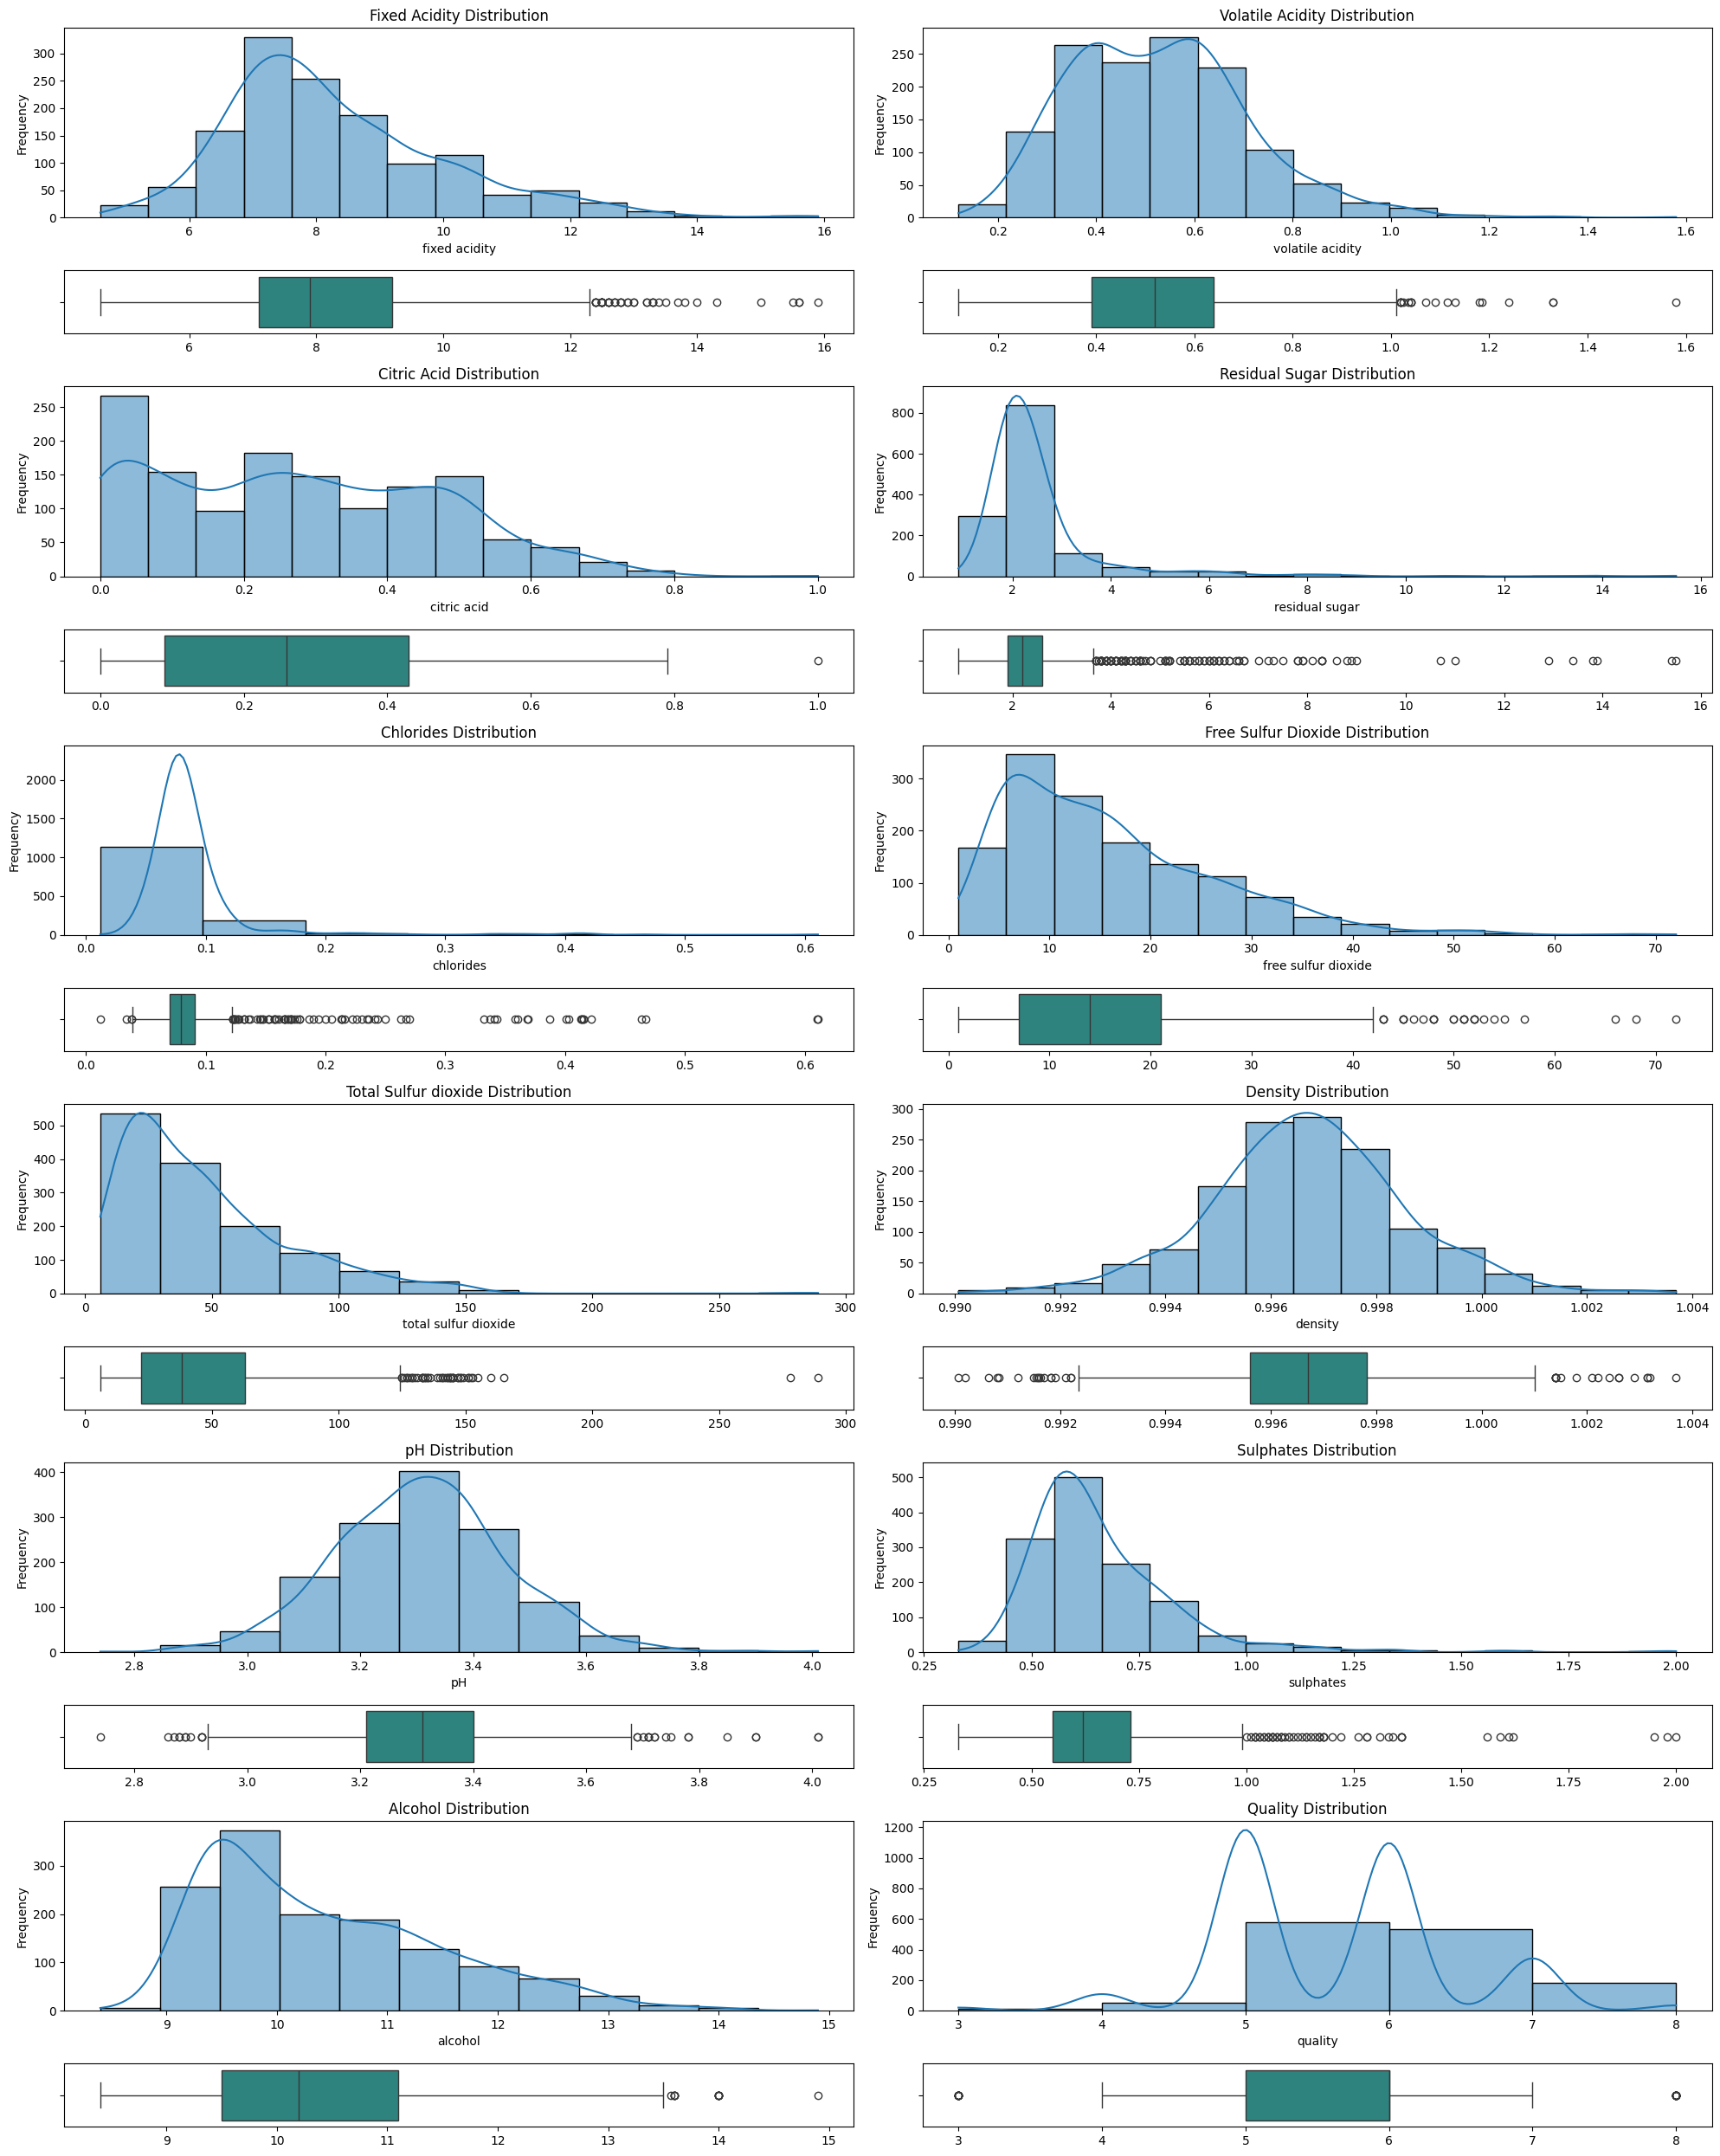

In [106]:
num_vars = len(numerical_variables)
nrows = num_vars // 2 + (num_vars % 2)
total_rows = nrows * 2
fig, axes = plt.subplots(
    nrows = total_rows,
    ncols=2,
    figsize=(20, 25),
    gridspec_kw={"height_ratios": [6, 2] * nrows}
)

# --- Row 1, Column 1: 'fixed acidity' ---
# Histplot
sns.histplot(
    data=total_data, x='fixed acidity', kde=True, bins=15, ax=axes[0, 0], palette="viridis"
)
axes[0, 0].set_title("Fixed Acidity Distribution", fontsize=12)
axes[0, 0].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="fixed acidity", ax=axes[1, 0], palette="viridis")
axes[1, 0].tick_params(axis="y", labelleft=False)
axes[1, 0].set_xlabel('')


# --- Row 1, Column 2: 'volatile acidity' ---
# Histplot
sns.histplot(
    data=total_data, x='volatile acidity', kde=True, bins=15, ax=axes[0, 1], palette="viridis"
)
axes[0, 1].set_title("Volatile Acidity Distribution", fontsize=12)
axes[0, 1].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="volatile acidity", ax=axes[1, 1], palette="viridis")
axes[1, 1].tick_params(axis="y", labelleft=False)
axes[1, 1].set_xlabel('')


# --- Row 2, Column 1: 'citric acid' ---
# Histplot
sns.histplot(
    data=total_data, x='citric acid', kde=True, bins=15, ax=axes[2, 0], palette="viridis"
)
axes[2, 0].set_title("Citric Acid Distribution", fontsize=12)
axes[2, 0].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="citric acid", ax=axes[3, 0], palette="viridis")
axes[3, 0].tick_params(axis="y", labelleft=False)
axes[3, 0].set_xlabel('')


# --- Row 2, Column 2: 'residual sugar' ---
# Histplot
sns.histplot(
    data=total_data, x='residual sugar', kde=True, bins=15, ax=axes[2, 1], palette="viridis"
)
axes[2, 1].set_title("Residual Sugar Distribution", fontsize=12)
axes[2, 1].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="residual sugar", ax=axes[3, 1], palette="viridis")
axes[3, 1].tick_params(axis="y", labelleft=False)
axes[3, 1].set_xlabel('')


# --- Row 3, Column 1: 'chlorides' ---
# Histplot
sns.histplot(
    data=total_data, x='chlorides', kde=True, bins=7, ax=axes[4, 0], palette="viridis"
)
axes[4, 0].set_title("Chlorides Distribution", fontsize=12)
axes[4, 0].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="chlorides", ax=axes[5, 0], palette="viridis")
axes[5, 0].tick_params(axis="y", labelleft=False)
axes[5, 0].set_xlabel('')


# --- Row 3, Column 2: 'free sulfur dioxide' ---
# Histplot
sns.histplot(
    data=total_data, x='free sulfur dioxide', kde=True, bins=15, ax=axes[4, 1], palette="viridis"
)
axes[4, 1].set_title("Free Sulfur Dioxide Distribution", fontsize=12)
axes[4, 1].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="free sulfur dioxide", ax=axes[5, 1], palette="viridis")
axes[5, 1].tick_params(axis="y", labelleft=False)
axes[5, 1].set_xlabel('')


# --- Row 4, Column 1: 'total sulfur dioxide' ---
# Histplot
sns.histplot(
    data=total_data, x='total sulfur dioxide', kde=True, bins=12, ax=axes[6, 0], palette="viridis"
)
axes[6, 0].set_title("Total Sulfur dioxide Distribution", fontsize=12)
axes[6, 0].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="total sulfur dioxide", ax=axes[7, 0], palette="viridis")
axes[7, 0].tick_params(axis="y", labelleft=False)
axes[7, 0].set_xlabel('')


# --- Row 4, Column 2: 'density' ---
# Histplot
sns.histplot(
    data=total_data, x='density', kde=True, bins=15, ax=axes[6, 1], palette="viridis"
)
axes[6, 1].set_title("Density Distribution", fontsize=12)
axes[6, 1].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="density", ax=axes[7, 1], palette="viridis")
axes[7, 1].tick_params(axis="y", labelleft=False)
axes[7, 1].set_xlabel('')


# --- Row 5, Column 1: 'pH' ---
# Histplot
sns.histplot(
    data=total_data, x='pH', kde=True, bins=12, ax=axes[8, 0], palette="viridis"
)
axes[8, 0].set_title("pH Distribution", fontsize=12)
axes[8, 0].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="pH", ax=axes[9, 0], palette="viridis")
axes[9, 0].tick_params(axis="y", labelleft=False)
axes[9, 0].set_xlabel('')


# --- Row 5, Column 2: 'sulphates' ---
# Histplot
sns.histplot(
    data=total_data, x='sulphates', kde=True, bins=15, ax=axes[8, 1], palette="viridis"
)
axes[8, 1].set_title("Sulphates Distribution", fontsize=12)
axes[8, 1].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="sulphates", ax=axes[9, 1], palette="viridis")
axes[9, 1].tick_params(axis="y", labelleft=False)
axes[9, 1].set_xlabel('')


# --- Row 6, Column 1: 'alcohol' ---
# Histplot
sns.histplot(
    data=total_data, x='alcohol', kde=True, bins=12, ax=axes[10, 0], palette="viridis"
)
axes[10, 0].set_title("Alcohol Distribution", fontsize=12)
axes[10, 0].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="alcohol", ax=axes[11, 0], palette="viridis")
axes[11, 0].tick_params(axis="y", labelleft=False)
axes[11, 0].set_xlabel('')


# --- Row 6, Column 2: 'quality' ---
# Histplot
sns.histplot(
    data=total_data, x='quality', kde=True, bins=5, ax=axes[10, 1], palette="viridis"
)
axes[10, 1].set_title("Quality Distribution", fontsize=12)
axes[10, 1].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="quality", ax=axes[11, 1], palette="viridis")
axes[11, 1].tick_params(axis="y", labelleft=False)
axes[11, 1].set_xlabel('')


plt.tight_layout()
plt.show()

**Conclusions:**

- **Fixed Acidity**: The plot shows a right-skewed distribution with a peak on 7 as the most common acidity in red wines.
- **Volatile Acidity**: 
- **Citric Acid**: 
- **Residual Sugar**: 
- **Chlorides**: 
- **Free Sulfur**: 
- **Total Sulfur**: 
- **Density**: 
- **pH**: 
- **Sulphates**: 
- **Alcohol**: 
- **Quality**: 

## 5. Multivariate Analysis <a id='c5'></a>

### 5.1 Numerical-Numerical Analysis <a id='c5-1'></a>

In [107]:
# regplot y heatmap por variable

### 5.2 Correlation Analysis <a id='c5-2'></a>

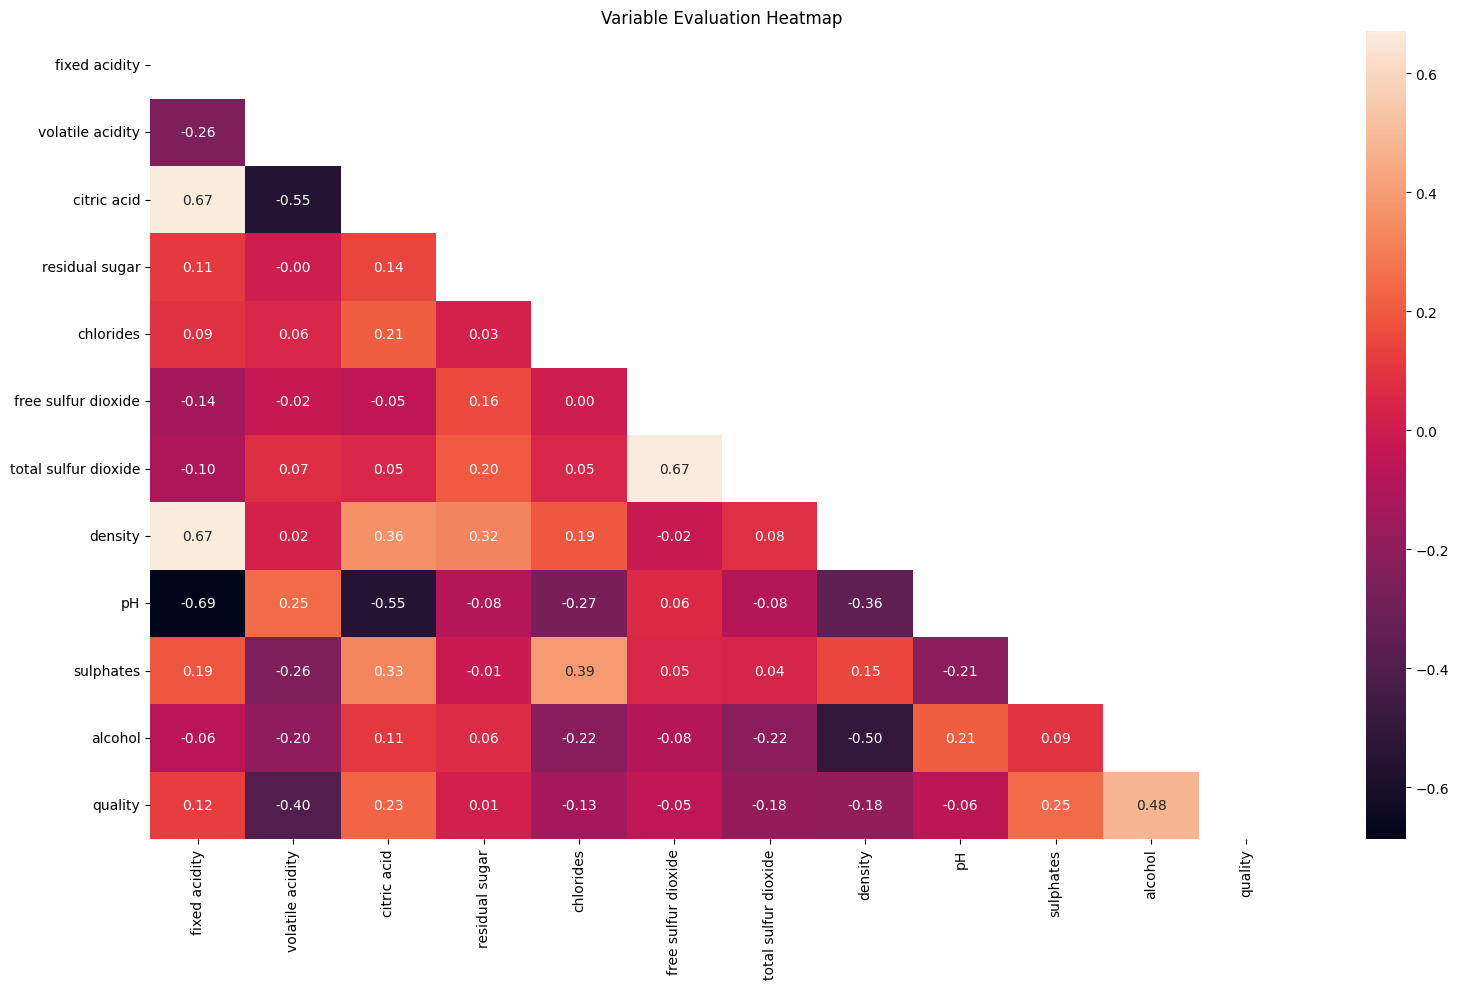

In [ ]:
plt.figure(figsize=(16,10))
columns = total_data.columns
sns.heatmap(total_data[columns].corr(), annot = True, fmt = ".2f", mask=np.triu(total_data[columns].corr()))
plt.title('Variables Evaluation Heatmap')
plt.tight_layout()
plt.show()

**Conclusions:**

- **Strongest Positive Correlation with 'Quality'**: `alcohol` with a 0.48 is the most important variable to determine the quality of a red wine.
- **Moderates Positive Correlations with 'Quality'**: `sulphates` (0.25) and `citric acid` (0.23) are important for determining the quality of red wine because they play crucial roles in preservation and balance. The first acts preserving the quality of the wine and adding antioxidants which are importants to prevent oxidation of the wine and the body of the consumer. Also prevents the growth of unwanted yeasts and bacteria. `citric acid`, if well-balanced, plays a crucial role on the taste.
- **Strongest Negative Correlation with 'Quality'**: `volatile acidity` (-0.40) this is expected as this gives a 'vinegar' taste and smell which is not tasty.
- **Moderates Negative Correlations with 'Quality'**: `total sulfur dioxide` (-0.18), `density` (-0.18) and `chlorides` (-0.13). The first give a bad taste, the second is expected as we can see the inverse relationship between `alcohol` and `density` whjen `alcohol` is an important factor to the quality of the red wine. The third contributes to the wine's saltiness and saltiness isn't a expected savour to a red wine.

**Additional Conclusions:**
- 

### 5.3 Pairplot Analysis <a id='c5-3'></a>

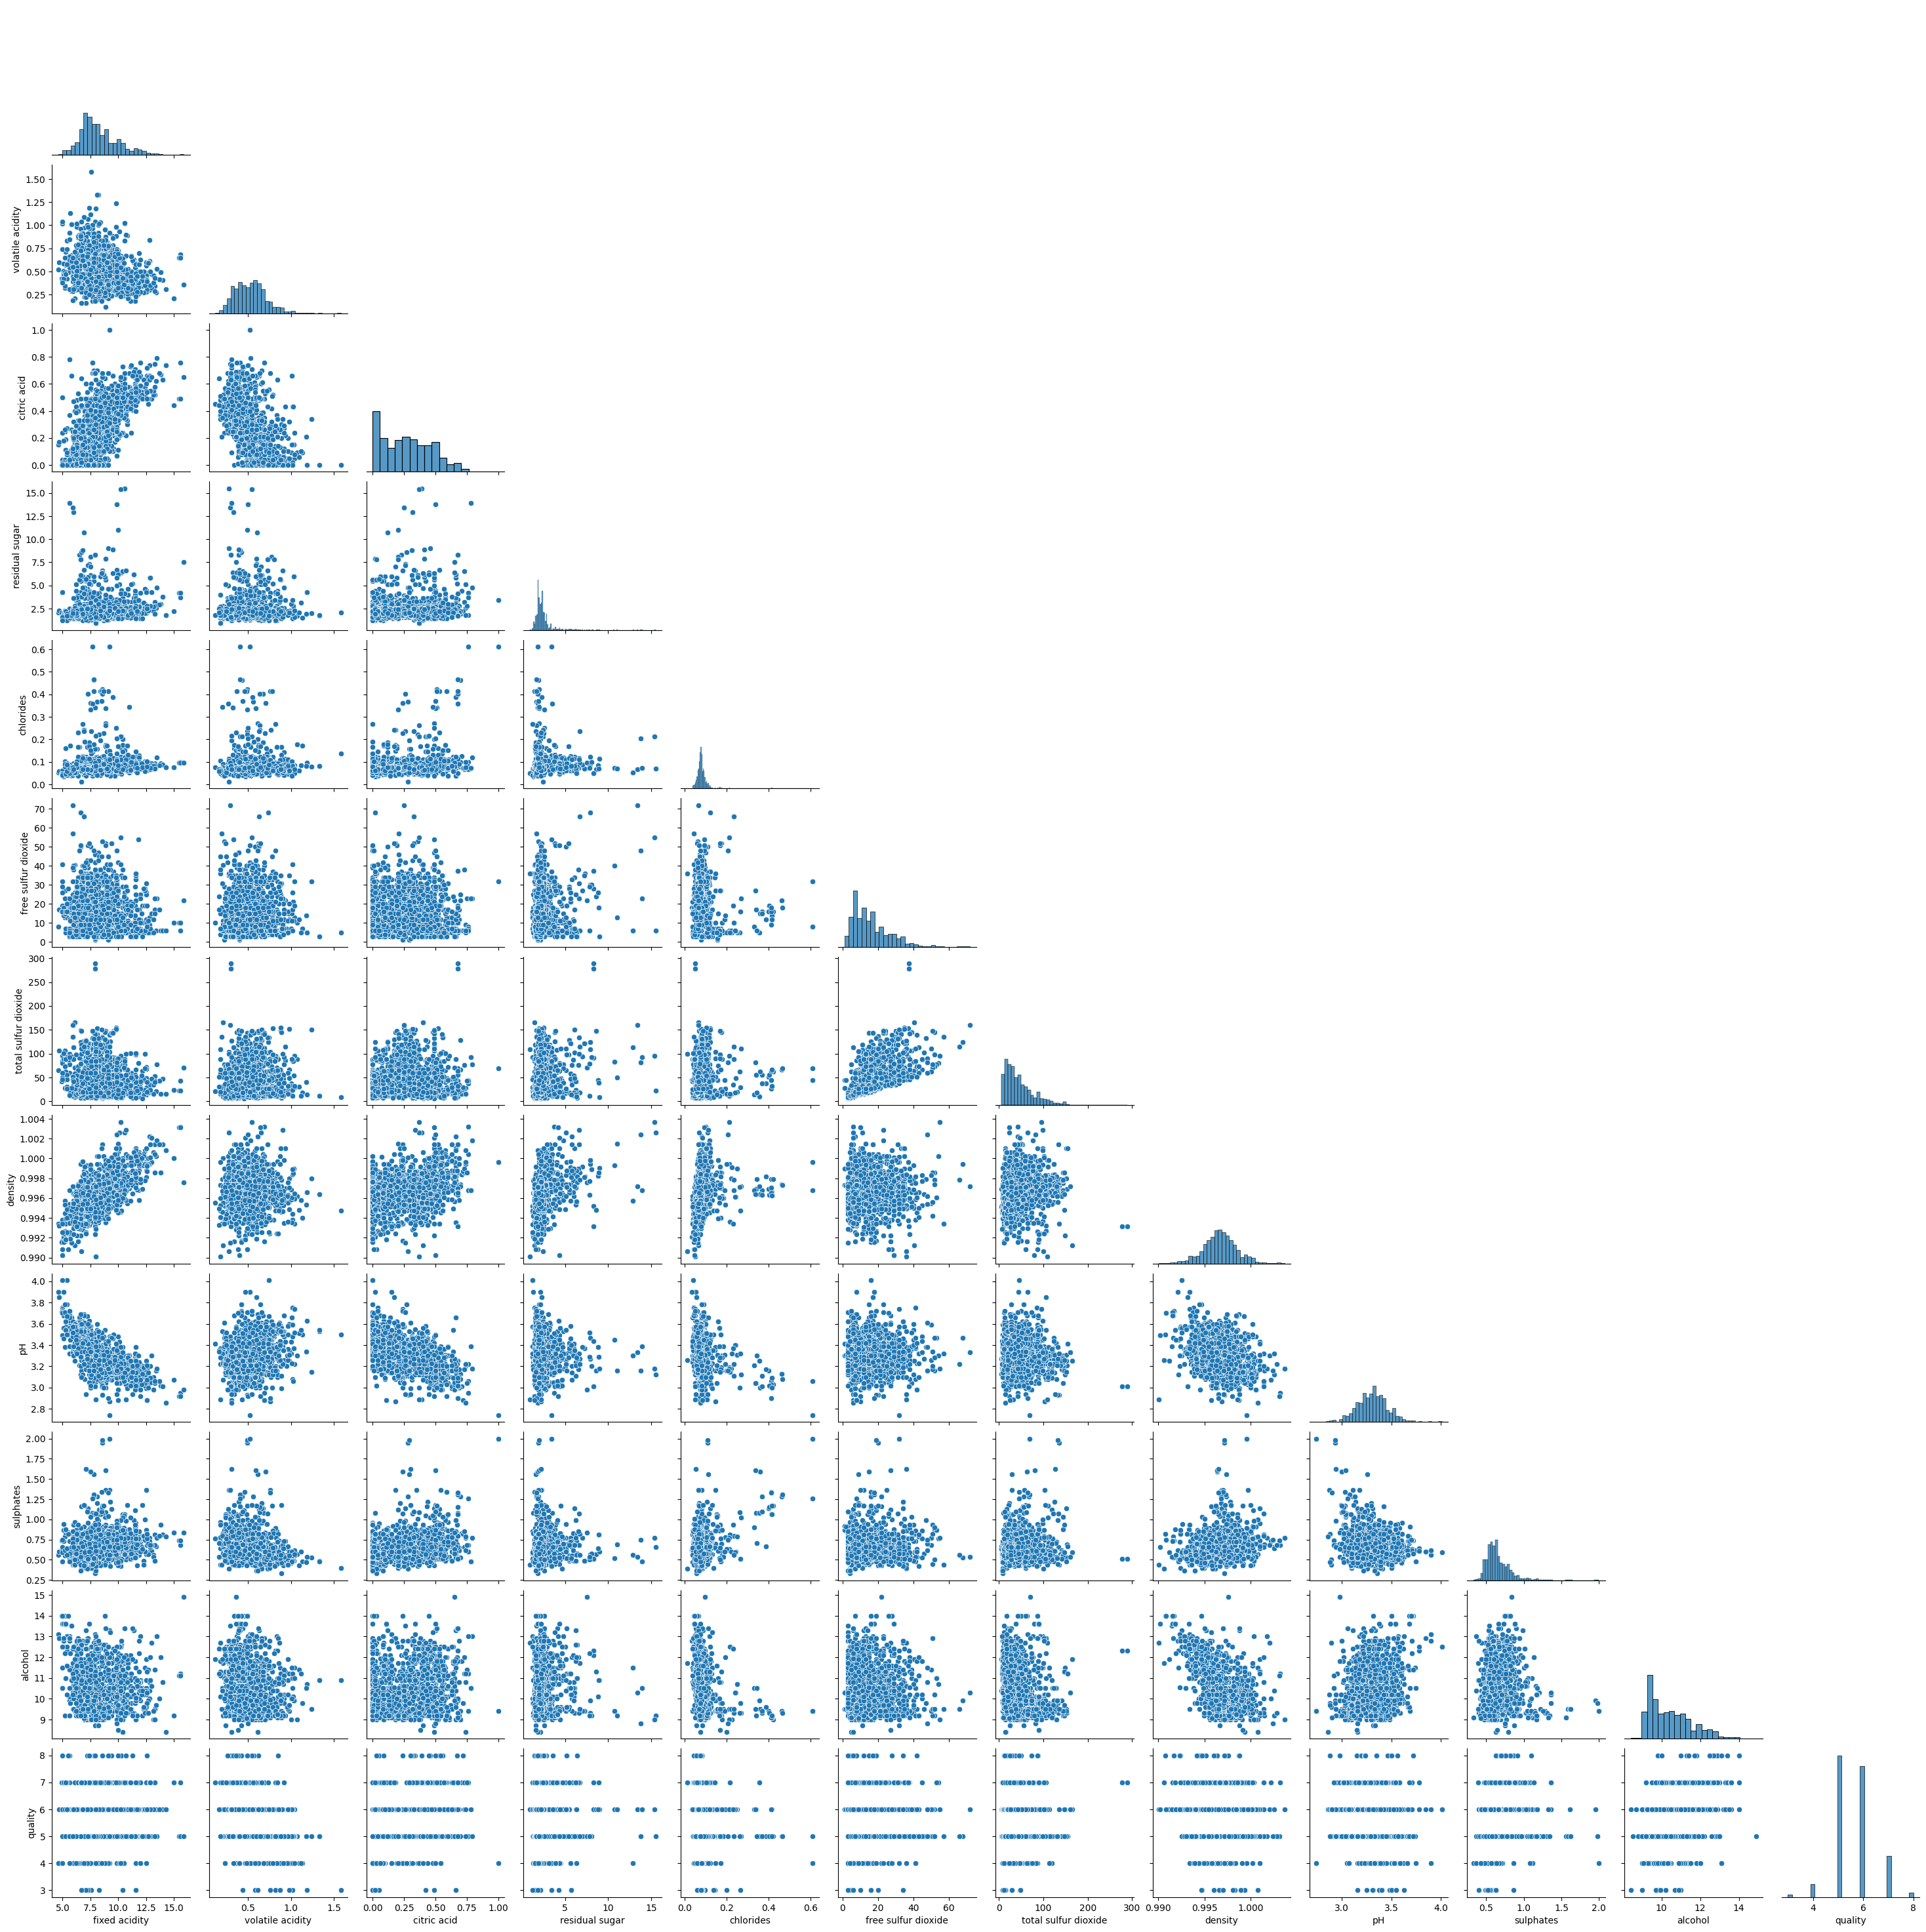

In [110]:
sns.pairplot(data = total_data, corner=True)